In [ ]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x if isinstance(x, list) else None)

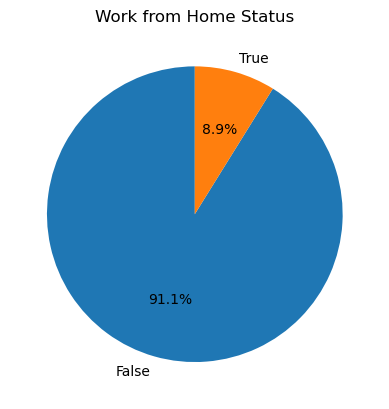

In [8]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

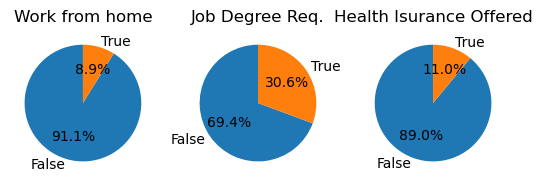

In [33]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home':'Work from home',
    'job_no_degree_mention':'Job Degree Req.',
    'job_health_insurance': 'Health Isurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts().reindex([False, True]), startangle= 90, autopct= '%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()